# WeatherPy

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

##  Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
Citys = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        Citys.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Retrieving {city} information for city {len(Citys)}')
    except KeyError:
        print(f'{city} Does Not Exist!')

Retrieving severo-kurilsk information for city 1
Retrieving bengkulu information for city 2
belushya guba Does Not Exist!
Retrieving ullapool information for city 3
Retrieving saskylakh information for city 4
Retrieving hermanus information for city 5
warqla Does Not Exist!
Retrieving rikitea information for city 6
Retrieving mongu information for city 7
Retrieving cape town information for city 8
Retrieving east london information for city 9
Retrieving vaini information for city 10
Retrieving ushuaia information for city 11
Retrieving carnarvon information for city 12
Retrieving togul information for city 13
Retrieving bandarbeyla information for city 14
Retrieving hobyo information for city 15
Retrieving bon air information for city 16
Retrieving butaritari information for city 17
Retrieving akyab information for city 18
Retrieving punta arenas information for city 19
Retrieving kidal information for city 20
Retrieving bethel information for city 21
Retrieving chuy information for ci

Retrieving atuona information for city 175
Retrieving san rafael information for city 176
Retrieving shingu information for city 177
Retrieving cherskiy information for city 178
Retrieving bambous virieux information for city 179
Retrieving zhuhai information for city 180
Retrieving clyde river information for city 181
Retrieving lugoba information for city 182
Retrieving kununurra information for city 183
Retrieving monze information for city 184
Retrieving iqaluit information for city 185
Retrieving plettenberg bay information for city 186
Retrieving dalian information for city 187
Retrieving uruacu information for city 188
Retrieving tukrah information for city 189
Retrieving la linea information for city 190
Retrieving mahon information for city 191
Retrieving sao joao da barra information for city 192
Retrieving upernavik information for city 193
Retrieving finschhafen information for city 194
Retrieving ballina information for city 195
Retrieving ahipara information for city 196


Retrieving utete information for city 351
Retrieving pontian kecil information for city 352
Retrieving deputatskiy information for city 353
Retrieving tambongon information for city 354
Retrieving mandera information for city 355
Retrieving jimo information for city 356
Retrieving bowmore information for city 357
Retrieving teguise information for city 358
Retrieving prince rupert information for city 359
Retrieving keffi information for city 360
Retrieving santa cruz cabralia information for city 361
samusu Does Not Exist!
Retrieving mattru information for city 362
Retrieving kruisfontein information for city 363
Retrieving tilichiki information for city 364
Retrieving hervey bay information for city 365
Retrieving hohhot information for city 366
Retrieving lindas information for city 367
Retrieving atar information for city 368
Retrieving zinder information for city 369
Retrieving cabedelo information for city 370
Retrieving saldanha information for city 371
Retrieving sorong informa

Retrieving kushiro information for city 528
Retrieving fort frances information for city 529
Retrieving caazapa information for city 530
Retrieving naryan-mar information for city 531
Retrieving nouadhibou information for city 532
Retrieving fort-shevchenko information for city 533
Retrieving petropavl information for city 534
Retrieving lithgow information for city 535
Retrieving van buren information for city 536
Retrieving praia da vitoria information for city 537
Retrieving tiarei information for city 538
Retrieving tautira information for city 539
Retrieving dudinka information for city 540
Retrieving gizo information for city 541
Retrieving revda information for city 542
Retrieving sola information for city 543
Retrieving uige information for city 544
Retrieving pustoshka information for city 545
Retrieving ulaangom information for city 546
Retrieving altamira information for city 547
Retrieving leningradskiy information for city 548
Retrieving sangueya information for city 549
R

In [6]:
# Create DataFrame
City_df = pd.DataFrame({
    "City": Citys,
    "Country": country,
    "Cloudiness": cloudiness,
    "Date": date,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
}
)
City_df 

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Severo-Kuril'sk,RU,0,1587217941,89,50.68,156.12,32.32,8.25
1,Bengkulu,ID,100,1587217941,79,-3.80,102.27,79.66,1.19
2,Ullapool,GB,0,1587217941,56,57.90,-5.16,53.01,11.99
3,Saskylakh,RU,0,1587217941,84,71.92,114.08,8.35,5.59
4,Hermanus,ZA,0,1587217743,40,-34.42,19.23,86.00,8.01
...,...,...,...,...,...,...,...,...,...
559,Kirando,TZ,85,1587218022,56,-7.42,30.60,79.09,5.19
560,Fenyi,CN,100,1587218022,92,27.81,114.67,66.90,3.89
561,Cayenne,GF,90,1587218022,78,4.93,-52.33,82.40,5.82
562,Camacupa,AO,35,1587218022,56,-12.02,17.48,71.13,4.81


In [7]:
# Output CSV
City_df.to_csv("Weather.csv", index = False, header = True)

In [8]:
City_df.count()

City               564
Country            564
Cloudiness         564
Date               564
Humidity           564
Latitude           564
Longitude          564
Max Temperature    564
Wind Speed         564
dtype: int64

## Latitude vs Temperature

This scatterplot displays the relationship between latitude and temperature. Max temperature is highest when close to the equator, Latitude 0.


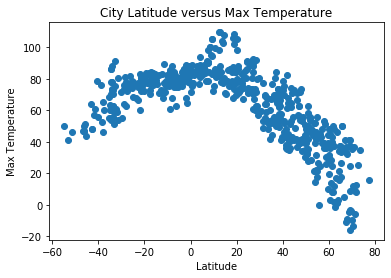

In [10]:
city_latitude = City_df["Latitude"]
max_temperature = City_df["Max Temperature"]
plt.scatter(city_latitude, max_temperature)
plt.title("City Latitude versus Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print("This scatterplot displays the relationship between latitude and temperature. Max temperature is highest when close to the equator, Latitude 0.")

## Latitude vs Humidity

Humidity has less of a correlation with latitude than temperature.


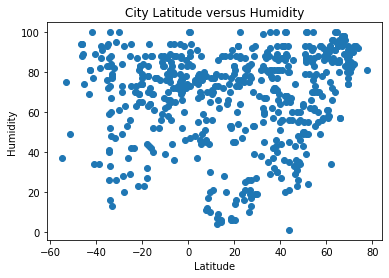

In [12]:
city_latitude = City_df["Latitude"]
humidity = City_df["Humidity"]
plt.scatter(city_latitude, humidity)
plt.title("City Latitude versus Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print("Humidity has less of a correlation with latitude than temperature.")

## Latitude vs Cloudiness

Cloudiness and latitude also do not have as strong of a correlation as temperature. Cloudiness depends more on proximity to oceans.


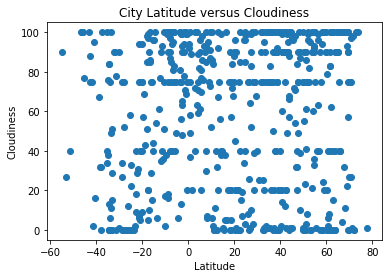

In [14]:
city_latitude = City_df["Latitude"]
cloudiness = City_df["Cloudiness"]
plt.scatter(city_latitude, cloudiness)
plt.title("City Latitude versus Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print("Cloudiness and latitude also do not have as strong of a correlation as temperature. Cloudiness depends more on proximity to oceans.")

## Latitude vs Wind Speed

Highest recorded wind speeds are between latitude 60-80


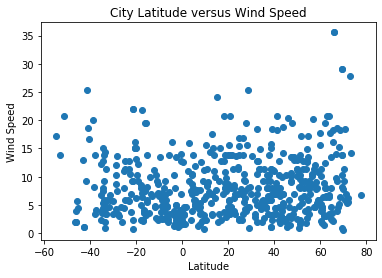

In [16]:
city_latitude = City_df["Latitude"]
wind = City_df["Wind Speed"]
plt.scatter(city_latitude, wind)
plt.title("City Latitude versus Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print("Highest recorded wind speeds are between latitude 60-80")

## Linear Regression

In [17]:
# Create northern and southern hemispheres
northern_hem = City_df[City_df["Latitude"] > 0]
southern_hem = City_df[City_df["Latitude"] < 0]

In [18]:
# Set up desired plots
plot_north_lat = northern_hem["Latitude"]
plot_north_temp = northern_hem["Max Temperature"]
plot_north_humid = northern_hem["Humidity"]
plot_north_cloud = northern_hem["Cloudiness"]
plot_north_speed = northern_hem["Wind Speed"]
plot_south_lat = southern_hem["Latitude"]
plot_south_temp = southern_hem["Max Temperature"]
plot_south_humid = southern_hem["Humidity"]
plot_south_cloud = southern_hem["Cloudiness"]
plot_south_speed = southern_hem["Wind Speed"]

In [19]:
# Enter data and labels for desired plots
x_plots = [plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat, plot_north_lat, plot_south_lat]
y_plots = [plot_north_temp, plot_south_temp, plot_north_humid, plot_south_humid, plot_north_cloud, plot_south_cloud, plot_north_speed, plot_south_speed ]
x_label = ["Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude", "Northern Hemisphere Latitude", "Southern Hemisphere Latitude"]
y_label = ["Max Temperature(F)", "Max Temperature(F)", "Humidity(%)", "Humidity(%)", "Cloudiness(%)", "Cloudiness(%)", "Wind Speed (MPH)", "Wind Speed (MPH)"]

The r-squared is: 0.7351906715841793


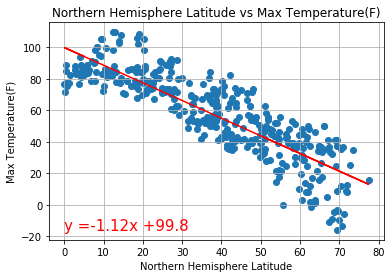

The r-squared is: 0.49189845040649893


<Figure size 432x288 with 0 Axes>

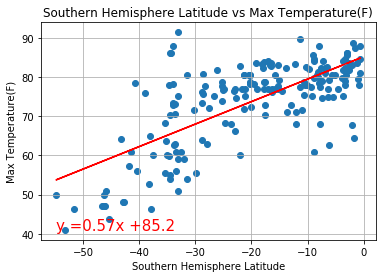

This is a scatter plot comparing Max Temperature at different latitudes in different hemispheres
The r-squared is: 0.09582732715480731


<Figure size 432x288 with 0 Axes>

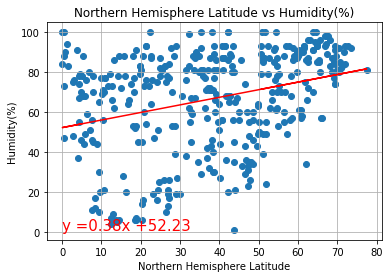

The r-squared is: 0.005790784435486519


<Figure size 432x288 with 0 Axes>

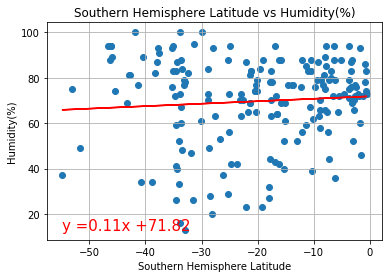

This is a scatter plot comparing Humidity at different latitudes in different hemispheres
The r-squared is: 0.00020334828233325677


<Figure size 432x288 with 0 Axes>

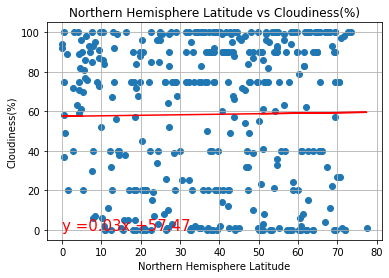

The r-squared is: 0.06655579390433827


<Figure size 432x288 with 0 Axes>

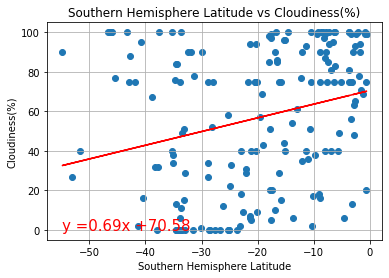

This is a scatter plot comparing Cloudiness at different latitudes in different hemispheres
The r-squared is: 0.02288525936859554


<Figure size 432x288 with 0 Axes>

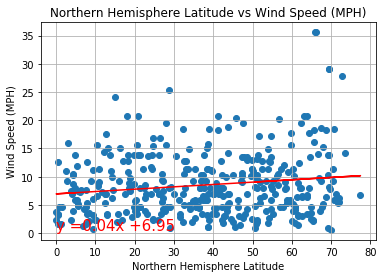

The r-squared is: 0.053580086296234286


<Figure size 432x288 with 0 Axes>

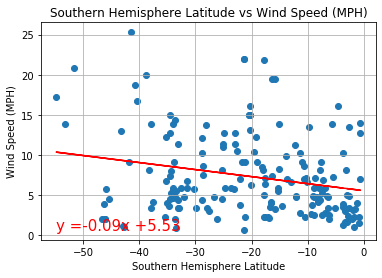

This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres


<Figure size 432x288 with 0 Axes>

In [22]:
for i in range(8):
    plt.figure()
    plt.scatter(x_plots[i], y_plots[i])
    plt.title(f'{x_label[i]} vs {y_label[i]}')
    plt.grid()
    plt.xlabel(f'{x_label[i]}')
    plt.ylabel(f'{y_label[i]}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_plots[i], y_plots[i])
    regress_values = x_plots[i]*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(x_plots[i], regress_values, "r-")
    plt.annotate(line_eq, (min(x_plots[i]), min(y_plots[i])), fontsize = 15, color = "red")
    print(f'The r-squared is: {rvalue**2}')
    plt.savefig(f"Images/{x_label[i]} vs {y_label[i]}.png")
    plt.show()
    plt.tight_layout()
    
    if y_label[i] == "Max Temperature(F)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Max Temperature at different latitudes in different hemispheres")
    elif y_label[i] == "Humidity(%)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Humidity at different latitudes in different hemispheres")
    elif y_label[i] == "Cloudiness(%)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Cloudiness at different latitudes in different hemispheres")
    elif y_label[i] == "Wind Speed (MPH)" and x_label[i] == "Southern Hemisphere Latitude":
        print("This is a scatter plot comparing Wind Speed at different latitudes in different hemispheres")
